In [2]:
# additional packages
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import argparse
import os
import time
import glob
from tqdm import tqdm
import scipy
import seaborn as sns
import pickle
from collections import Counter
import matplotlib.font_manager as fm
import sys
sys.path.append('../../.')
from utils.screening import tanimoto_numpy, fp_screening_function

print('Packages loaded')

/home/mgonzalez/.conda/envs/pytorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


Packages loaded


/home/mgonzalez/.conda/envs/pytorch/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


## Figure 1

In [8]:
data_path = '../../data/dataset/285k_train_15k_fp_and_atom_counts_w_H.gz'
dataset_df = pd.read_pickle(data_path)
pred_fp_arr = pickle.load( open('../../data/calculations/pred_fp_arr_dropout_0_5_atom_count.gz', "rb"))
test_df = dataset_df[dataset_df['split'] == 'test']
N_SAMPLES = len(test_df)


In [9]:
samples_df = test_df[:N_SAMPLES]
target_fp_arr = np.asarray(samples_df['morgan_fp'])
target_fp_arr = np.stack(target_fp_arr)
pred_fp_arr = pred_fp_arr[:N_SAMPLES]


# similarity between predicted and ground truth fp
cnn_tan = tanimoto_numpy(pred_fp_arr, target_fp_arr)

# similarity between ground truth fingerprints from randomly drawn molecules
n_samples = len(test_df.dropna())
perm_1 = np.random.RandomState(seed=42).permutation(n_samples)
perm_2 = np.random.RandomState(seed=12).permutation(n_samples)
mask = (perm_1 == perm_2)
m_perm_1 = perm_1[~mask]
m_perm_2 = perm_2[~mask]

fp1 = test_df.iloc[m_perm_1]['morgan_fp']
fp2 = test_df.iloc[m_perm_2]['morgan_fp']
fp1_ar = np.asarray(fp1)
fp2_ar = np.asarray(fp2)
fp1_ar = np.stack(fp1_ar)
fp2_ar = np.stack(fp2_ar)

random_tan = tanimoto_numpy(fp1_ar, fp2_ar)

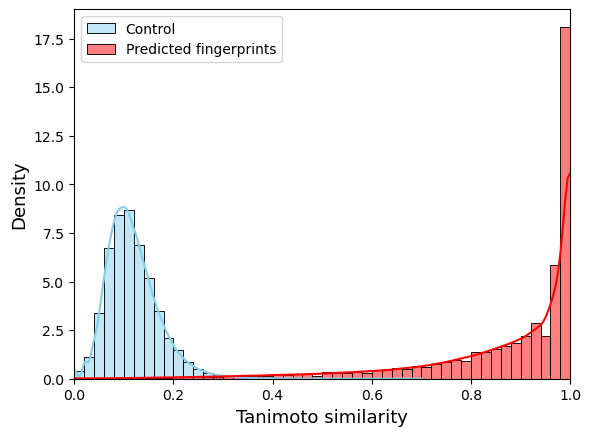

In [10]:
plt.rcParams.update(plt.rcParamsDefault)

sns.histplot(data=random_tan,  color="skyblue", label="Control",
             kde=True, stat='density', binrange=[0,1], binwidth=0.02)
sns.histplot(data=cnn_tan, color="red", label="Predicted fingerprints", 
             kde=True, stat='density', binrange=[0,1],  binwidth=0.02 )
plt.axis([0, 1, 0, None])
plt.xlabel('Tanimoto similarity', fontsize =13)
plt.ylabel('Density', fontsize =13)
plt.legend() 

##plt.savefig("tanimoto_distributions_dropout_0_5_all_testset_280k.pdf", format="pdf", bbox_inches="tight")
plt.show()